In [363]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from scipy.stats import zscore
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline

In [364]:
# read again 
clean_df = pd.read_csv('csvDataFile/cleanData.csv')

clean_df.shape

(657, 13)

In [365]:
# drop target columns
x = clean_df.drop(columns=['A16']) 
y = clean_df['A16']

In [366]:
x.head()

,A2,A3,A4,A5,A6,A8,A9,A10,A11,A13,A14,A15
0,52.50,7.000,1.0,0.0,0.0,3.000,0.0,0.0,0,0.0,0.0,0
1,19.50,9.585,1.0,0.0,0.0,0.790,0.0,0.0,0,0.0,80.0,350
2,36.50,4.250,1.0,0.0,10.0,3.500,0.0,0.0,0,0.0,454.0,50
3,15.75,0.375,1.0,0.0,1.0,1.000,0.0,0.0,0,0.0,120.0,18
4,36.33,3.790,1.0,0.0,12.0,1.165,1.0,0.0,0,0.0,200.0,0


In [367]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: A16, dtype: float64

In [368]:
x = x.values

x

array([[ 52.5  ,   7.   ,   1.   , ...,   0.   ,   0.   ,   0.   ],
       [ 19.5  ,   9.585,   1.   , ...,   0.   ,  80.   , 350.   ],
       [ 36.5  ,   4.25 ,   1.   , ...,   0.   , 454.   ,  50.   ],
       ...,
       [ 27.67 ,   0.75 ,   1.   , ...,   0.   , 220.   , 251.   ],
       [ 33.67 ,   2.165,   1.   , ...,   1.   , 120.   ,   0.   ],
       [ 23.08 ,   0.   ,   1.   , ...,   2.   ,   0.   ,   0.   ]])

In [369]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.20, random_state=0)
# training using x_train and y_train

In [370]:
print(f"Size of x_train > {len(x_train)}")
print(f"Size of x_test > {len(x_test)}")

Size of x_train > 525
Size of x_test > 132


In [371]:
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(x_train)
rescaledX_test = scaler.transform(x_test)

print(rescaledX_train)

[[1.19641256e-01 4.93181818e-02 5.00000000e-01 ... 0.00000000e+00
  1.50000000e-01 7.00000000e-05]
 [2.52556054e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  1.38888889e-01 3.00000000e-05]
 [4.97757848e-01 7.00000000e-02 5.00000000e-01 ... 0.00000000e+00
  3.00000000e-01 0.00000000e+00]
 ...
 [1.65919283e-01 3.40909091e-02 5.00000000e-01 ... 1.00000000e+00
  4.44444444e-01 0.00000000e+00]
 [2.64573991e-01 4.54545455e-02 5.00000000e-01 ... 0.00000000e+00
  2.31944444e-01 5.00000000e-03]
 [1.31479821e-01 4.58409091e-01 1.00000000e+00 ... 0.00000000e+00
  3.61111111e-01 0.00000000e+00]]


# K-Nearest Neighbor
step required 
1. implement your model ( train )
2. calculate the accuracy of the model ( test )
3. using gridsearchcv to change the parameter and increase the accuracy 
4.  show the accuracy again
5. using joblib ( or other library ) export the final version of model ( which is the one accuracy more higher ) to pkl file

***training model need to use rescaledX_train and y _train, testing model using rescaledX_test and y_test

In [373]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # Define the KNN model
# knn = KNeighborsClassifier()

# # Create a parameter grid to tune the hyperparameters
# param_grid = {
#     'n_neighbors': range(1, 11, 2),  # Tune the number of neighbors from 1 to 10 (odd numbers)
#     'weights': ['uniform', 'distance'],  # Test both uniform and distance weighting
#     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
#     'leaf_size': [10, 20, 30, 40, 50],  # Leaf size for tree algorithms
#     'p': [1, 2],  # Minkowski distance with p=1 (Manhattan) and p=2 (Euclidean)
#     'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
# }

# # Initialize the GridSearchCV object with KNN and the parameter grid
# knn_grid = GridSearchCV(knn, param_grid, cv=5)  # Using 5-fold cross-validation

# # Train the model using the training data
# knn_grid.fit(rescaledX_train, y_train)

In [374]:
# # Print the best hyperparameters and the best score
# print(f"Best Score from Grid Search: {knn_grid.best_score_}")
# print(f"Best Number of Neighbors: {knn_grid.best_estimator_.n_neighbors}")
# print(f"Best Weights: {knn_grid.best_estimator_.weights}")
# print(f"Best Algorithm: {knn_grid.best_estimator_.algorithm}")
# print(f"Best Leaf Size: {knn_grid.best_estimator_.leaf_size}")
# print(f"Best p Value: {knn_grid.best_estimator_.p}")
# print(f"Best Metric: {knn_grid.best_estimator_.metric}")


# # Accuracy on the training set
# train_accuracy = knn_grid.score(rescaledX_train, y_train)
# print(f"Training Accuracy: {train_accuracy:.4f}")

# # Accuracy on the testing set
# test_accuracy = knn_grid.score(rescaledX_test, y_test)
# print(f"Testing Accuracy: {test_accuracy:.4f}")

In [375]:
# from sklearn.metrics import accuracy_score, mean_squared_error

# # Predict the target labels for the test data
# y_pred_knn = knn_grid.predict(rescaledX_test)

# # Calculate accuracy
# knn_accuracy = accuracy_score(y_test, y_pred_knn)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# print(f"Accuracy: {knn_accuracy:.4f}")
# print(f"Root Mean Square Error (RMSE): {rmse:.4f}")



In [376]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Generate the confusion matrix
# cm = confusion_matrix(y_test, y_pred_knn)

# # Option 1: Display the confusion matrix using seaborn
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()

# # Option 2: Using ConfusionMatrixDisplay from sklearn
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_grid.classes_)
# disp.plot()
# plt.show()



In [377]:
# from sklearn.metrics import classification_report

# # Print the classification report for precision, recall, and F1 score
# print(classification_report(y_test, y_pred_knn))



In [378]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Calculate precision, recall, and F1 score
# precision = precision_score(y_test, y_pred_knn)
# recall = recall_score(y_test, y_pred_knn)
# f1 = f1_score(y_test, y_pred_knn)

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")


In [379]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# def print_scores(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred) * 100
#     precision = precision_score(y_true, y_pred) * 100
#     recall = recall_score(y_true, y_pred) * 100
#     f1 = f1_score(y_true, y_pred) * 100
    
#     print(f"Accuracy: {accuracy:.2f}%")
#     print(f"Precision: {precision:.2f}%")
#     print(f"Recall: {recall:.2f}%")
#     print(f"F1 Score: {f1:.2f}%")
    
# # Use the function to print the scores for the test set
# print_scores(y_test, y_pred_knn)

In [380]:
#ignore

# #Loading and using the saved model
# # Load the model from the .pkl file
# loaded_knn = joblib.load('best_knn_model.pkl')

# # Predict using the loaded model
# y_loaded_pred = loaded_knn.predict(rescaledX_test)

# # Confirm that accuracy of the loaded model matches the tuned model's accuracy
# loaded_model_accuracy = accuracy_score(y_test, y_loaded_pred)
# print(f"Loaded Model Accuracy: {loaded_model_accuracy:.4f}")


## Take this ver

In [382]:
#import libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [425]:
#implement KNN model
knn = KNeighborsClassifier()

#use GridSearchCV to tune hyperparameters
param_grid = {
    'n_neighbors': range(1, 6),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
}

knn_grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
knn_grid.fit(rescaledX_train, y_train)

#best parameters and evaluate model
print("Best parameters:")
print(knn_grid.best_params_)

#get the best model from GridSearchCV
best_knn = knn_grid.best_estimator_

#evaluate on training data
y_train_pred = best_knn.predict(rescaledX_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#evaluate on test data
y_test_pred = best_knn.predict(rescaledX_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy Train Data:", train_accuracy)
print("Accuracy Test Data:", test_accuracy)

Best parameters:
{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy Train Data: 0.8761904761904762
Accuracy Test Data: 0.8560606060606061


In [384]:
#calculate accuracy, precision, recall and F1 score
accuracy_knn = accuracy_score(y_test, y_test_pred) * 100
print('Accuracy  : %.5f' % accuracy_knn)




# precision_knn = precision_score(y_test, y_test_pred) * 100
# recall_knn = recall_score(y_test, y_test_pred) * 100
# f1_knn = f1_score(y_test, y_test_pred) * 100

# print('Precision : %.5f' % precision_knn)
# print('Recall    : %.5f' % recall_knn)
# print('F1 Score  : %.5f' % f1_knn)

Accuracy  : 85.60606


In [385]:
#caluclate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

RMSE: 0.37939345531966406


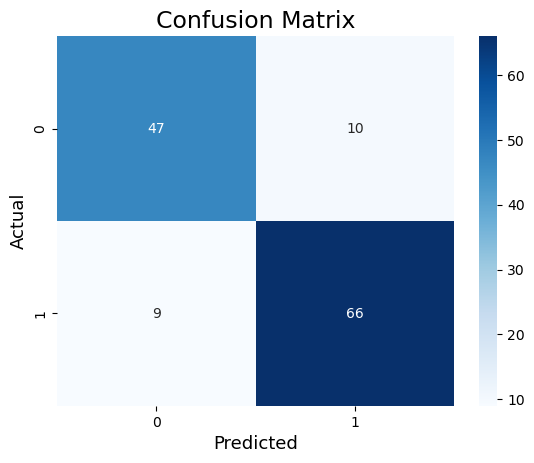

In [386]:
#display confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Predicted', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [387]:
#display classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        57
         1.0       0.87      0.88      0.87        75

    accuracy                           0.86       132
   macro avg       0.85      0.85      0.85       132
weighted avg       0.86      0.86      0.86       132



In [388]:
#save the model to knn.pkl file
joblib.dump(best_knn, 'knn.pkl')
print("Model saved to 'knn.pkl'")

Model saved to 'knn.pkl'
